In [ ]:
#-------------------------------------------------------
# Name: Luis Reyes Sandoval
# Date: 26/04/2023
# Description: Trabajo #3
# Version: 1.0
#-------------------------------------------------------

# Se tiene un fichero csv con información relativa a datos de un estudio realizado
# en la zona de Boston, donde se analizan diferentes variables, como son el
# índice de crimen, el número de habitaciones, el porcentaje de habitantes de
# clase baja y el valor medio de las casas de esa zona.

"""
 The Boston house-price data of Harrison, D. and Rubinfeld, D.L. 'Hedonic
 prices and the demand for clean air', J. Environ. Economics & Management,
 vol.5, 81-102, 1978.   Used in Belsley, Kuh & Welsch, 'Regression diagnostics
 ...', Wiley, 1980.   N.B. Various transformations are used in the table on
 pages 244-261 of the latter.

 Variables in order:
 CRIM     per capita crime rate by town
 ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
 INDUS    proportion of non-retail business acres per town
 CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
 NOX      nitric oxides concentration (parts per 10 million)
 RM       average number of rooms per dwelling
 AGE      proportion of owner-occupied units built prior to 1940
 DIS      weighted distances to five Boston employment centres
 RAD      index of accessibility to radial highways
 TAX      full-value property-tax rate per $10,000
 PTRATIO  pupil-teacher ratio by town
 B        1000(Bk - 0.63)^2 where Bk is the proportion of blacks by town
 LSTAT    % lower status of the population
 MEDV     Median value of owner-occupied homes in $1000's
"""


In [54]:
#Pasos:
# Importar librerías a utilizar para el caso en cuestión (panda, matplotlib)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# leer csv
df = pd.read_csv('HousingData.csv')

# Renombrar columnas...
df.rename(columns={
    'CRIM': 'Tasa Criminalidad',
    'ZN': 'Suelo Residencial',
    'INDUS': 'Acres Comerciales',
    'CHAS': 'Charles River',
    'NOX': 'Concentración óxidos nítricos',
    'RM': 'media cuartos x vivienda',
    'AGE': 'Edad',
    'DIS': 'Distancias ponderadas',
    'RAD': 'Índice accesibilidad carreteras',
    'TAX': 'Tasa impuesto',
    'PTRATIO': 'ratio alumno-profesor localidad',
    'B': 'proporción personas de color',
    'LSTAT': '% estado inferior población',
    'MEDV': 'Valor medio de las viviendas ocupadas'
    }, inplace=True)

print(df.head)



<bound method NDFrame.head of      Tasa Criminalidad  Suelo Residencial  Acres Comerciales  Charles River   
0              0.00632               18.0               2.31            0.0  \
1              0.02731                0.0               7.07            0.0   
2              0.02729                0.0               7.07            0.0   
3              0.03237                0.0               2.18            0.0   
4              0.06905                0.0               2.18            0.0   
..                 ...                ...                ...            ...   
501            0.06263                0.0              11.93            0.0   
502            0.04527                0.0              11.93            0.0   
503            0.06076                0.0              11.93            0.0   
504            0.10959                0.0              11.93            0.0   
505            0.04741                0.0              11.93            0.0   

     Concentración óx

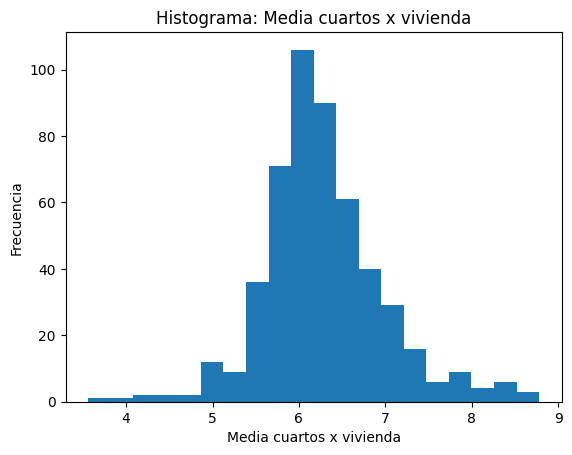

In [55]:
# Histograma: Un histograma es útil para ver la distribución de una
# variable, es decir, nos permite ver los valores más comunes. Para
# el caso que se presenta se desea ver la distribución de la cantidad
# media de habitaciones en el estudio realizado.

# Crear un histograma
fig, ax = plt.subplots()
ax.hist(df['media cuartos x vivienda'], bins=20)

# Establecer las etiquetas de los ejes y el título
ax.set_xlabel('Media cuartos x vivienda')
ax.set_ylabel('Frecuencia')
ax.set_title('Histograma: Media cuartos x vivienda')

# Mostrar el gráfico
plt.show()

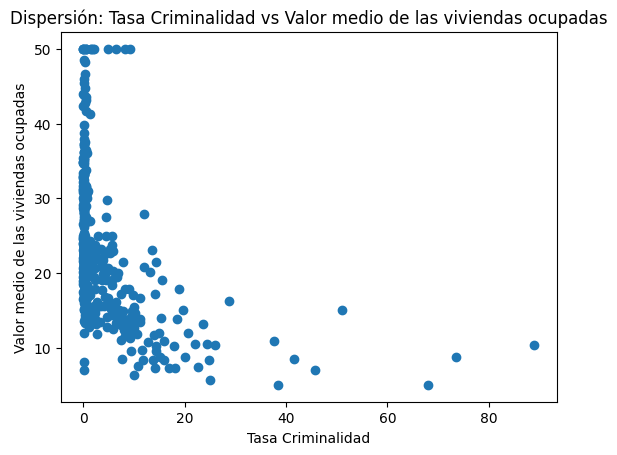

In [56]:
#Dispersión: sirve para representar la relación entre dos variables.
# Para nuestro caso se desea ver la relación entre índice de crimen
# y el valor mediano de las casas. En otras palabras, ¿el índice de
# crimen afecta el valor medio de las casas?

# Crear un gráfico de dispersión
fig, ax = plt.subplots()
ax.scatter(df['Tasa Criminalidad'], df['Valor medio de las viviendas ocupadas'])

# Establecer las etiquetas de los ejes y el título
ax.set_xlabel('Tasa Criminalidad')
ax.set_ylabel('Valor medio de las viviendas ocupadas')
ax.set_title('Dispersión: Tasa Criminalidad vs Valor medio de las viviendas ocupadas')

# Mostrar el gráfico
plt.show()



In [ ]:
#Barras: Un gráfico de barras es útil para comparar una variable
# entre distintos grupos o categorías. Por ejemplo, si quisiéramos
# observar el valor medio de cada ciudad. Para nuestro caso se
# desea agrupar por ciudad y toma la media del valor mediano.
# Gráfica las 10 primeras ciudades.

# Agrupar por ciudad y tomar la media del valor mediano
df_grouped = df.groupby('Índice accesibilidad carreteras')['Valor medio de las viviendas ocupadas'].median()

# Ordenar de mayor a menor
df_grouped = df_grouped.sort_values(ascending=False)

# Tomar las 10 primeras ciudades
#df_grouped = df_grouped[:10]

# Crear un gráfico de barras
fig, ax = plt.subplots()
ax.bar(df['Índice accesibilidad carreteras'], df_grouped)

# Establecer las etiquetas de los ejes y el título
ax.set_xticklabels(df_grouped.index, rotation=90)
ax.set_ylabel('Valor medio de las viviendas ocupadas')
ax.set_title('Barras: Valor medio de las viviendas ocupadas por ciudad')

# Mostrar el gráfico
plt.show()

###########################################################################################
#### IMPORTANTE: NO EXISTE LA COLUMNNA CIUDAD, POR LO QUE NO SE PUEDE EJECUTAR EL CÓDIGO ##
###########################################################################################



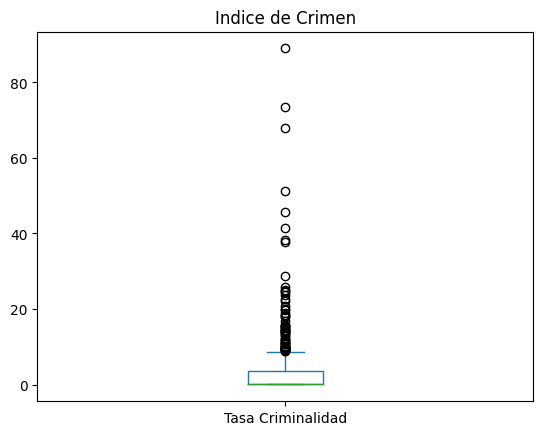

In [58]:
# Cajas: Los diagramas de cajas son útiles para representar grupos
# de datos y compararlos entre ellos. Otro uso importante es que
# nos permiten identificar de forma sencilla si una variable tiene
# muchos outliers (valores atípicos) esto es, elementos que se
# alejan de los valores frecuentes de dicha variable. Para nuestro
# caso, se desea ver los valores atípicos de índice de crimen en los
# diferentes cuantiles de valor mediano.


fig, ax = plt.subplots()

df['Tasa Criminalidad'].plot(kind='box', ax=ax)

# Establecer las etiquetas de los ejes y el título
#ax.set_xlabel('Tasa Criminalidad')
ax.set_title('Indice de Crimen')

# Mostrar el gráfico
plt.show()
